<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Ecuaciones-Diferenciales-Parciales-I/blob/main/integrales_de_Fourier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

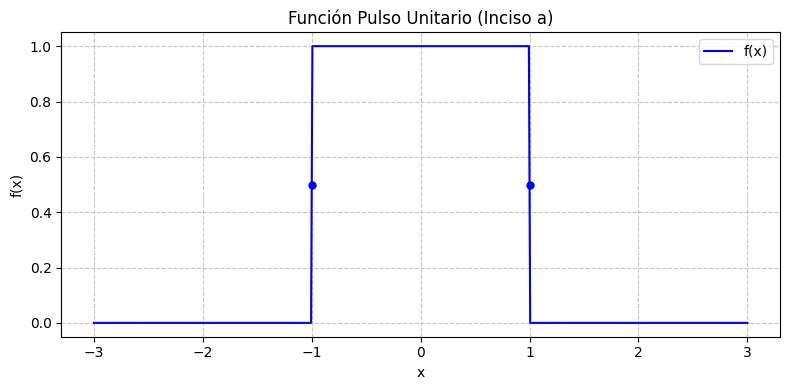

A(w) = Piecewise((2*sin(w)/(pi*w), (w > 0) | (w < 0)), (2/pi, True))
B(w) = 0


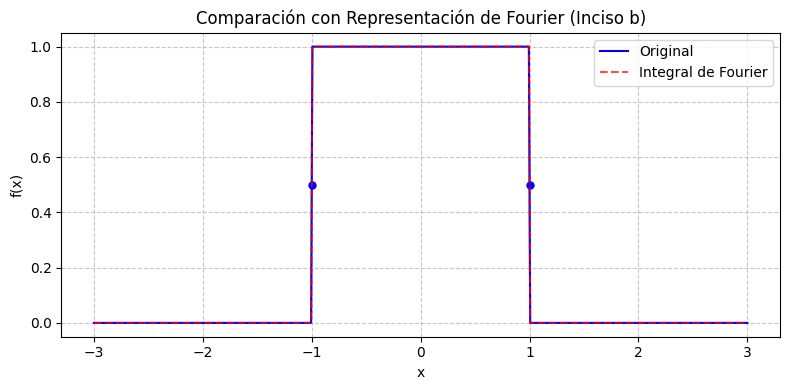

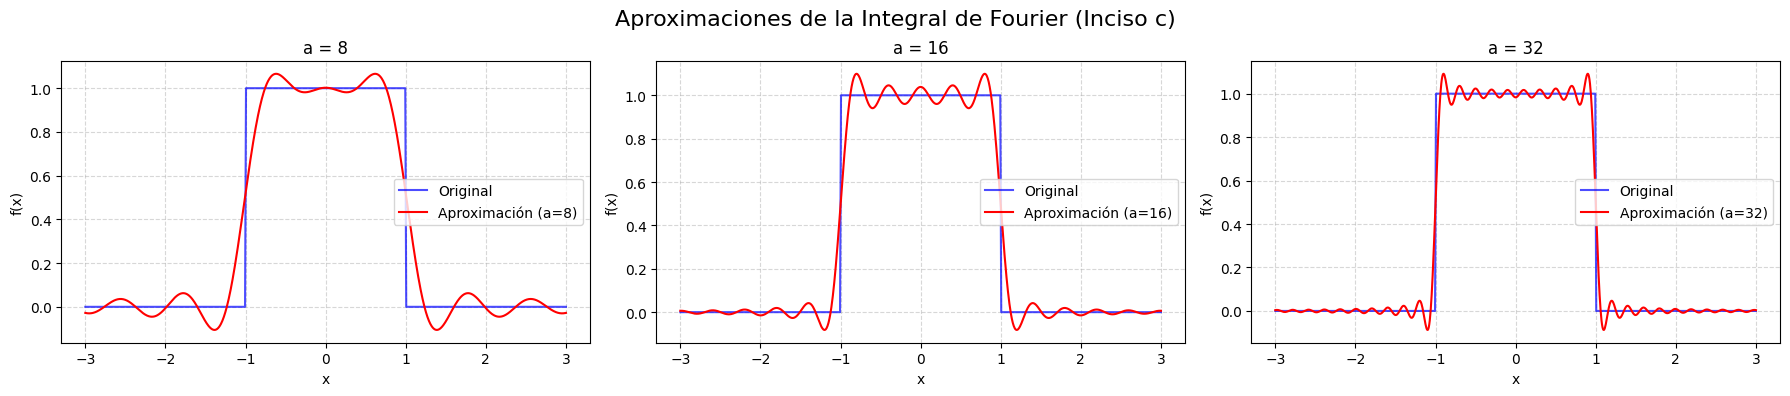

In [22]:
# %% [a) Gráfica de la función original]
import numpy as np
import matplotlib.pyplot as plt

def f_original(x):
    """Función pulso unitario."""
    return np.piecewise(x,
                        [np.abs(x) < 1, np.abs(x) == 1, np.abs(x) > 1],
                        [1, 0.5, 0])

# Generar datos para la gráfica
x = np.linspace(-3, 3, 1000)
y = f_original(x)

# Puntos de discontinuidad (x = ±1)
disc_x = np.array([-1, 1])
disc_y = np.array([0.5, 0.5])

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', label='f(x)')
plt.plot(disc_x, disc_y, 'bo', markersize=5) # Puntos en discontinuidades
plt.title('Función Pulso Unitario (Inciso a)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# %% [b) Representación como integral de Fourier (cálculo simbólico y gráfica)]
import sympy as sp

# Símbolos
v, w = sp.symbols('v w', real=True)
x_sym = sp.symbols('x', real=True)

# Calcular A(w) y B(w)
A_w = (1/sp.pi) * sp.integrate(sp.cos(w*v), (v, -1, 1))
A_w = sp.simplify(A_w)
B_w = 0

print(f"A(w) = {A_w}")
print(f"B(w) = {B_w}")

# La representación de Fourier es la misma función original
# Graficar junto a la función original
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', label='Original')
plt.plot(disc_x, disc_y, 'bo', markersize=5)
plt.plot(x, y, 'r--', label='Integral de Fourier', alpha=0.7) # Superpuesta
plt.title('Comparación con Representación de Fourier (Inciso b)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# %% [c) Aproximaciones con a = 8, 16, 32]
from scipy.special import sici # Para la función integral seno Si(z)

def f_approx(x, a):
    """Aproximación de la integral de Fourier con extremo superior a."""
    si1, _ = sici(a * (x + 1)) # Si(a(x+1))
    si2, _ = sici(a * (x - 1)) # Si(a(x-1))
    return (1 / np.pi) * (si1 - si2)

# Valores de a y datos para x
a_vals = [8, 16, 32]
x_vals = np.linspace(-3, 3, 1000)

# Crear figura con 3 subgráficas
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Aproximaciones de la Integral de Fourier (Inciso c)', fontsize=16)

for i, a in enumerate(a_vals):
    y_approx = f_approx(x_vals, a)
    y_orig = f_original(x_vals)

    axs[i].plot(x_vals, y_orig, 'b-', label='Original', alpha=0.7)
    axs[i].plot(x_vals, y_approx, 'r-', label=f'Aproximación (a={a})')
    axs[i].set_title(f'a = {a}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()